In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report ,confusion_matrix

import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore")

In [127]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [128]:
df = pd.read_csv("https://raw.githubusercontent.com/Youssef3082004/Tawasul/nlp/Cleaned_Emotions_2.csv")
df

,CleanedText,Emotion
0,feel really helpless heavy hearted,Fear
1,enjoy able slouch relax unwind frankly need la...,Sadness
2,give internship dmrg feel distraught,Fear
3,know feel lose,Sadness
4,kindergarten teacher thoroughly weary job take...,Fear
...,...,...
416103,feel like tell horny devil find site suit sort...,Love
416104,begin realize feel agitate restless would thin...,Anger
416105,feel curious previous early dawn time seek tro...,Surprise
416106,feel becuase tyranical nature government el sa...,Anger


In [129]:
max_len = len(df["CleanedText"].max().split(" "))
print(f"Longest Sentence in the dataset is has lenght = {max_len} word")

Longest Sentence in the dataset is has lenght = 11 word


In [130]:
X = df["CleanedText"]
Y = df["Emotion"]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [131]:
VOCAB_SIZE = 10000
MAX_LEN = 25
NUM_CLASSES = 6

In [132]:
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

In [133]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [134]:
X_train_padded = pad_sequences(X_train_sequences, maxlen=MAX_LEN, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=MAX_LEN, padding='post', truncating='post')


In [ ]:

label_encoder = LabelEncoder()
y_train_labels = label_encoder.fit_transform(y_train)
y_test_labels = label_encoder.transform(y_test)

NUM_CLASSES = len(label_encoder.classes_)

In [136]:
y_train_encoded = to_categorical(y_train_labels, num_classes=NUM_CLASSES)
y_test_encoded = to_categorical(y_test_labels, num_classes=NUM_CLASSES)

In [137]:
weights = class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train.values)
class_weights = dict(enumerate(weights))
print(class_weights)

{0: 1.2110053695376959, 1: 1.4563471230575389, 2: 0.4928183764289965, 3: 2.002851882603516, 4: 0.5731389847317204, 5: 4.664620817218766}


In [138]:
# Check how many unique words are actually in your dataset
word_counts = tokenizer.word_counts
sorted_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

print(f"Total unique words found: {len(word_counts)}")
print(f"Word rank 20,000 appears {sorted_counts[15000][1]} times")

Total unique words found: 57979
Word rank 20,000 appears 5 times


In [139]:
model = Sequential([
    Embedding(VOCAB_SIZE, 128,input_length=MAX_LEN),
    Bidirectional(LSTM(128,return_sequences=True,use_bias=True)),
    Dropout(0.5),
    Bidirectional(LSTM(64,use_bias=True)),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience = 6, restore_best_weights=True)

In [140]:
history = model.fit(X_train_padded,y_train_encoded,epochs=20,batch_size=64,validation_data=(X_test_padded, y_test_encoded),callbacks=[early_stopping],class_weight=class_weights)

Epoch 1/20
5202/5202 ━━━━━━━━━━━━━━━━━━━━ 68s 12ms/step - accuracy: 0.8097 - loss: 0.4493 - val_accuracy: 0.9301 - val_loss: 0.1587
Epoch 2/20
5202/5202 ━━━━━━━━━━━━━━━━━━━━ 64s 12ms/step - accuracy: 0.9304 - loss: 0.1437 - val_accuracy: 0.9320 - val_loss: 0.1448
Epoch 3/20
5202/5202 ━━━━━━━━━━━━━━━━━━━━ 63s 12ms/step - accuracy: 0.9335 - loss: 0.1309 - val_accuracy: 0.9338 - val_loss: 0.1422
Epoch 4/20
5202/5202 ━━━━━━━━━━━━━━━━━━━━ 63s 12ms/step - accuracy: 0.9362 - loss: 0.1215 - val_accuracy: 0.9342 - val_loss: 0.1385
Epoch 5/20
5202/5202 ━━━━━━━━━━━━━━━━━━━━ 64s 12ms/step - accuracy: 0.9374 - loss: 0.1164 - val_accuracy: 0.9340 - val_loss: 0.1347
Epoch 6/20
5202/5202 ━━━━━━━━━━━━━━━━━━━━ 63s 12ms/step - accuracy: 0.9381 - loss: 0.1130 - val_accuracy: 0.9334 - val_loss: 0.1414
Epoch 7/20
5202/5202 ━━━━━━━━━━━━━━━━━━━━ 63s 12ms/step - accuracy: 0.9387 - loss: 0.1107 - val_accuracy: 0.9336 - val_loss: 0.1461
Epoch 8/20
5202/5202 ━━━━━━━━━━━━━━━━━━━━ 63s 12ms/step - accuracy: 0.9403 -

In [141]:
loss, acc = model.evaluate(X_test_padded, y_test_encoded, verbose=0)
print("Validation accuracy of final model:", acc)


Validation accuracy of final (restored) model: 0.9339717626571655


(0.0, 0.2529977228492498)

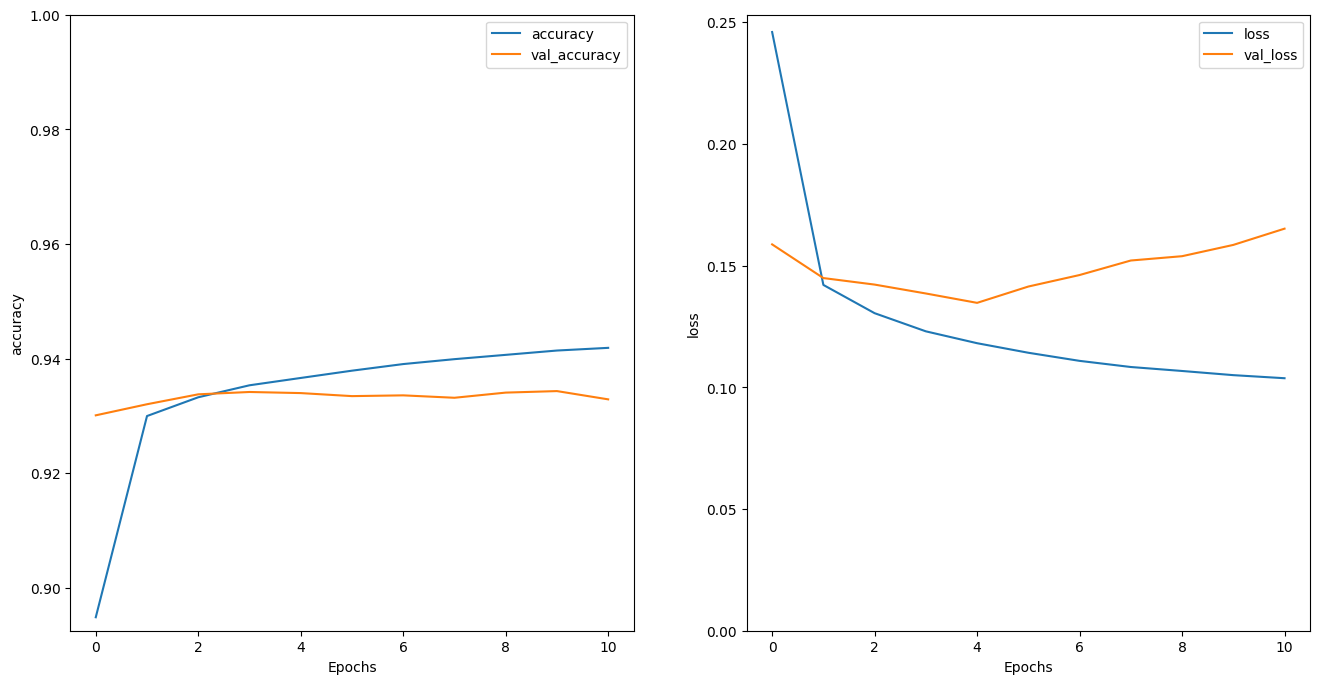

In [142]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [ ]:
y_pred_probs = model.predict(X_test_padded)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

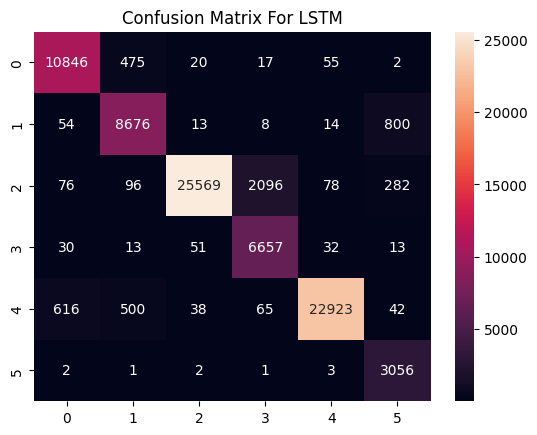

In [ ]:
conf = confusion_matrix(y_true=y_test_labels,y_pred=y_pred_labels)
sns.heatmap(conf,annot=True,fmt="1.0f")
plt.title("Confusion Matrix For LSTM")
plt.show()



In [ ]:
y_test_labels = np.argmax(y_test_encoded, axis=1)

print(classification_report(y_test_labels, y_pred_labels, zero_division=0))

2601/2601 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     11415
           1       0.89      0.91      0.90      9565
           2       1.00      0.91      0.95     28197
           3       0.75      0.98      0.85      6796
           4       0.99      0.95      0.97     24184
           5       0.73      1.00      0.84      3065

    accuracy                           0.93     83222
   macro avg       0.88      0.95      0.91     83222
weighted avg       0.94      0.93      0.94     83222



In [ ]:
tokenizer_path = 'tokenizer.pickle'
with open(tokenizer_path, 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [155]:
model.save("sentiment_model_final.keras")

In [ ]:
model = load_model("sentiment_model.keras")


with open("/kaggle/working/tokenizer.pickle", "rb") as f:
    tokenizer = pickle.load(f)

text = ["i feel romantic too"]

max_length = 25

seq = tokenizer.texts_to_sequences(text)
padded = pad_sequences(seq, maxlen=max_length, padding="post")


y_pred = model.predict(padded)
label = y_pred.argmax(axis=1)

print("Predicted class:", label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
Predicted class: [3]


In [168]:
for digit, class_name in enumerate(label_encoder.classes_):
    print(digit, "→", class_name)


0 → Anger
1 → Fear
2 → Happy
3 → Love
4 → Sadness
5 → Surprise
